<a href="https://colab.research.google.com/github/Creatrohit9/ROHIT-BHDAURIYA--Bike-Sharing-Demand-Prediction/blob/main/ROHIT_BHADAURIYA(Proponent_Ds)_Bike_Sharing_Demand_Prediction_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Importing libraries

In [2]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiAUVk_WaZ9EuJSijJ7bXO6_Mu1UNglsBWPCJNiTwR0cpyTo-jjrEg
Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Copy of SeoulBikeData.csv'


In [5]:
bike_data = pd.read_csv(file_path, encoding= 'unicode_escape')

In [6]:
##Exploratory Data Analysis

# **Exploratory Data Analysis**

Taking a quick look at our Data

In [7]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# import numpy as np
# bike_data['Date'].dtypes()

In [9]:
bike_data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,22/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [10]:
bike_data.shape

(8760, 14)

#Changing column names into simple column names

In [11]:
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
bike_data = bike_data.rename(columns={'Rented Bike Count': 'Rented_Bike_Count', 
                        'Temperature(°C)': 'Temperature',
                        'Humidity(%)': 'Humidity', 
                        'Wind speed (m/s)': 'Wind_speed', 
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'Dew_point_temperature', 
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation', 
                        'Rainfall(mm)': 'Rainfall', 
                        'Snowfall (cm)': 'Snowfall',
                        'Functioning Day': 'Functioning_Day'})

#Finding categorical features in our dataset.

In [13]:
#To find out categorical features in our dataset
bike_data.dtypes

Date                      object
Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
dtype: object

In [14]:
print(bike_data.dtypes.astype(str).value_counts())

float64    6
int64      4
object     4
dtype: int64


In [15]:
print(bike_data['Seasons'].unique())
print(bike_data['Holiday'].unique())
print(bike_data['Functioning_Day'].unique())
print(bike_data['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


#Checking for null values

In [16]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [17]:
bike_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

So, here we can see, This dataset contains no null values. So, we need not to worry about missing Data.

In [18]:
#importing library
import datetime as dt

#Extracting features from date

In [19]:
bike_data['Date']=pd.to_datetime(bike_data['Date'])
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Day'] = pd.DatetimeIndex(bike_data['Date']).day
bike_data['Month']= pd.DatetimeIndex(bike_data['Date']).month
bike_data['weekday']=pd.DatetimeIndex(bike_data['Date']).weekday

In [20]:
bike_data.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [21]:
display(bike_data['weekday'].unique())

array([3, 6, 2, 4, 0, 5, 1])

In [22]:
import numpy as np

In [23]:
#weekday is in range 0-6, so we need to make it to normal 1-7
bike_data['weekday'] = np.array(bike_data['weekday'])+1
display(bike_data['weekday'].unique())

array([4, 7, 3, 5, 1, 6, 2])

In [24]:
# Rented_bike_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
# Rented_bike_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
# Rented_bike_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bike_per_Weekday= pd.DataFrame(bike_data['Rented_Bike_Count'].groupby(by=bike_data['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_bike_per_Weekday

,weekday,Rented_Bike_Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


In [25]:
bike_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [26]:
bike_data.groupby(['Year','Month']).agg({'Rented_Bike_Count':['sum']}).reset_index()

,Year,Month,Rented_Bike_Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


In [27]:
%matplotlib inline

In [28]:
bike_data['Months_string'] = bike_data['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [29]:
import plotly.express as px


In [30]:
month_year_group= bike_data.groupby(by=['Month','Months_string','Year']).agg({'Rented_Bike_Count':'sum'}).reset_index()
px.line(month_year_group,y= 'Rented_Bike_Count',x= 'Months_string',color= 'Year',title='Total Rented Bikes in 2017 and 2018 on monthly basis',width=1000, height=500)

In [31]:
px.bar(month_year_group,y= 'Rented_Bike_Count',x='Months_string' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


As we can see, rented bike count was very low in 2017.

in 2018, we can see a sharp increase in Rented bike count.

Highest Demand for rented bike is high in midyear (may, june, july)

#Exploring Categorical variables

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(12,8))

In [33]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

**Counting no. of sections in categorical features in dataset**

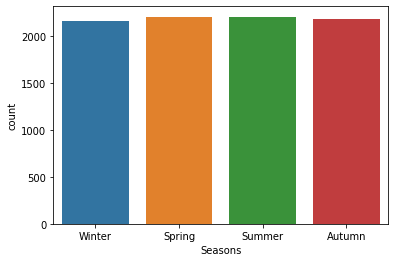

In [34]:
sns.countplot(x ='Seasons', data = bike_data)

In our dataset, information about all months are given.

In [35]:
# sns.countplot(x ='Holiday', data = bike_data)
# plt.xlabel('Holiday')
# plt.ylabel('Counts')

In [36]:
# sns.countplot(x ='Functioning_Day', data = bike_data)
# commented it because, obviously functioning data will be more (as given in data set) so no need to visualize it.

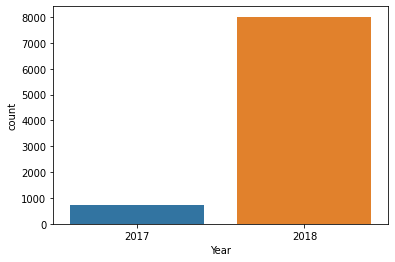

In [37]:
sns.countplot(x ='Year', data = bike_data)


Our dataset mostly contains information of year 2018 and very little information of year 2017.

**Finding relation between variables USING BAR PLOT**

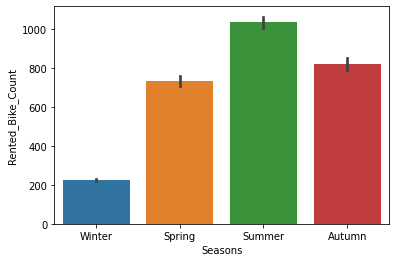

In [38]:
#Finding relation betwwen seasons and rented bike count. telling us rented bike count on that season.
# sns.set_style('darkgrid')
sns.barplot(x ='Seasons', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')


Rented bike count is less in winter and almost consistantly higher in other months.

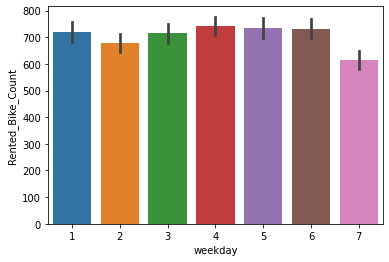

In [39]:
sns.barplot(x ='weekday', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')


In all days, rented bike count is consistant and equal.

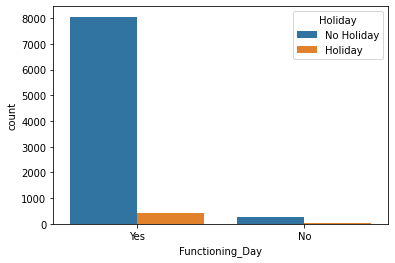

In [40]:
sns.countplot(x ='Functioning_Day',hue = 'Holiday', data = bike_data)


We got to know all Holidays are falling into functioning days.

**Visualizing Seasons by comparing between holidays and no holidays.**

In [41]:
# , height=2.5, aspect=.8, col_wrap=4
# g = sns.catplot(x="Seasons", col="Holiday", col_wrap=4,
#                 data=bike_data,
#                 kind="count")

#Exploring Numerical Variables

In [42]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

In [43]:
numerical_features = ['Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall' ]

In [44]:
# List of colors in the color palettes
rgb_values = sns.color_palette("bright")

In [45]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

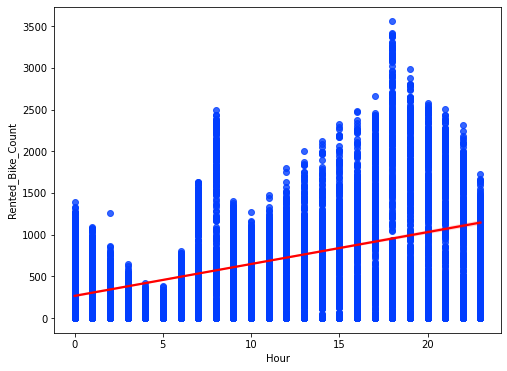

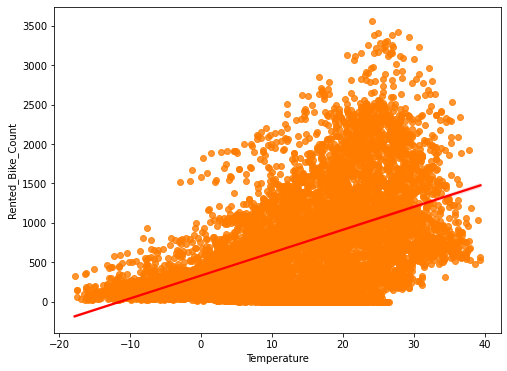

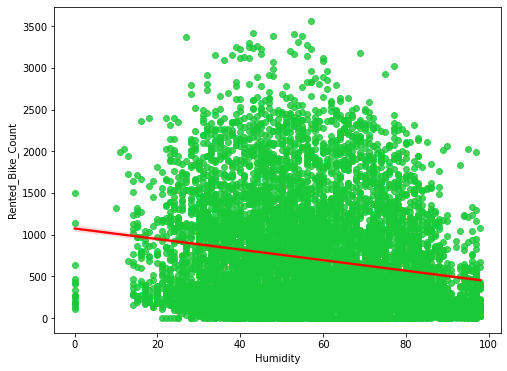

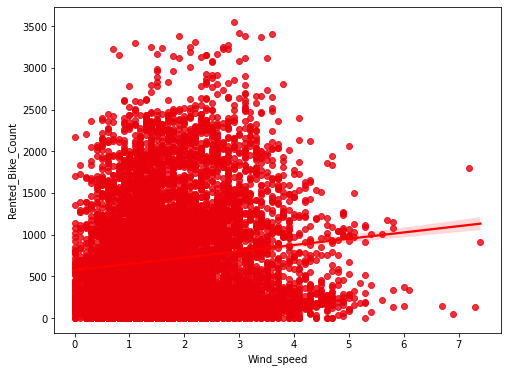

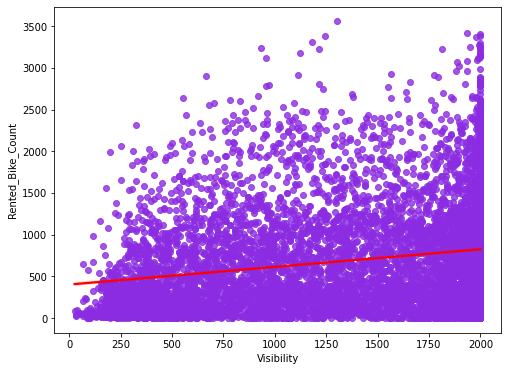

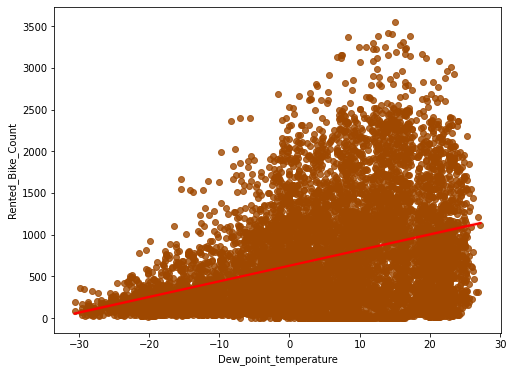

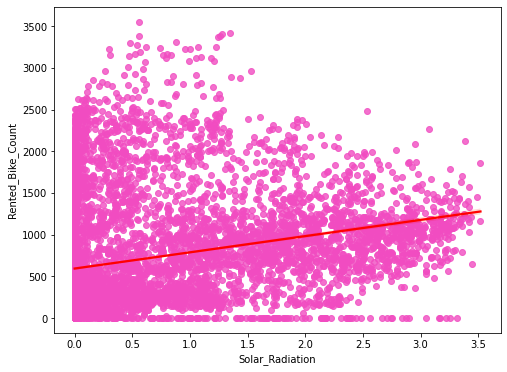

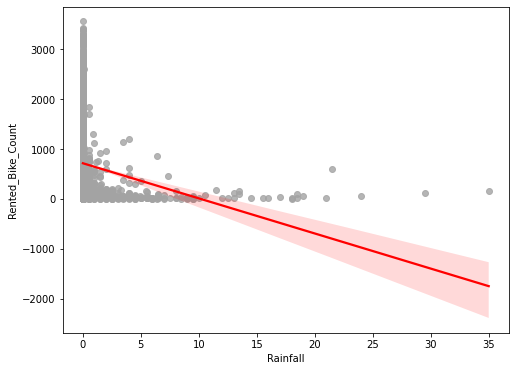

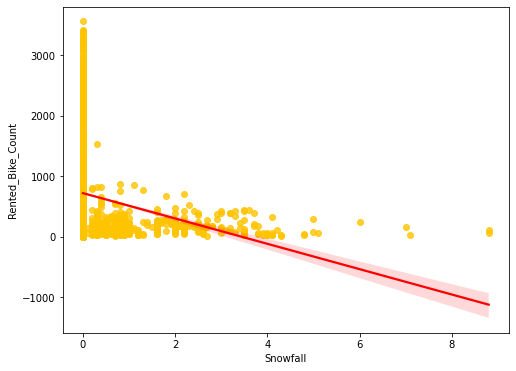

In [46]:
plt.rcParams['figure.figsize'] = (8, 6)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

Hour: Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).

Temperature : rented bike count is highest between 20 °C and 30 °C.

Humidity : 
Humidity is the amount of water vapor in the air. So, People preferring to borrow bike When there is less humidity.

Wind_speed :
wind speed doesn't affect our data much.

Visibility:
Visibility doesn't affect our results much.

SnowFall and Rainfall:
People don't prefer borrowing bike, where there is rainfall or snowfall.

In [47]:
# The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity.

In [48]:
px.histogram(bike_data, x="Rented_Bike_Count",marginal="violin",color='Year')

In [49]:
#square root transformation
px.histogram(bike_data, x=np.sqrt(bike_data["Rented_Bike_Count"]),color='Year',marginal="violin", title='Probalility density of Square root transformation of Number of Rented Bikes',histnorm='probability density')

Finding Correlation of Dependent variable with other variables

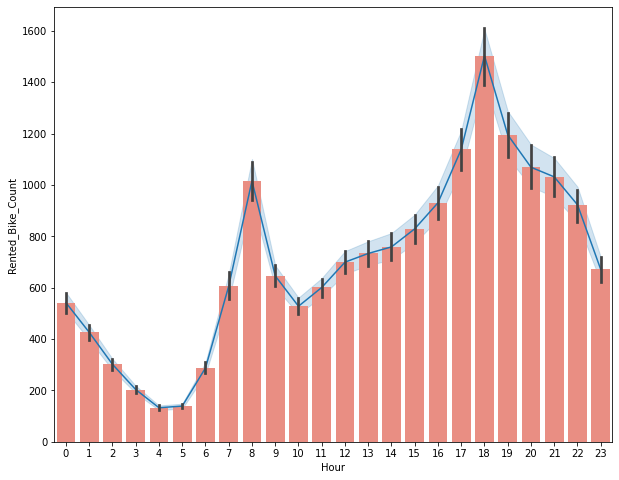

In [50]:
plt.figure(figsize=(10,8))
sns.lineplot(x = bike_data['Hour'],y = bike_data['Rented_Bike_Count'])
sns.barplot(x = bike_data['Hour'],y = bike_data['Rented_Bike_Count'], color="salmon")


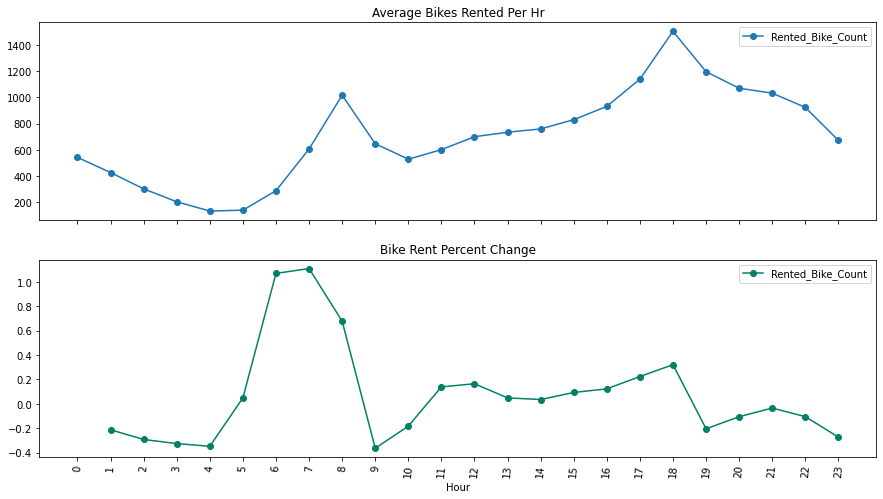

In [51]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))

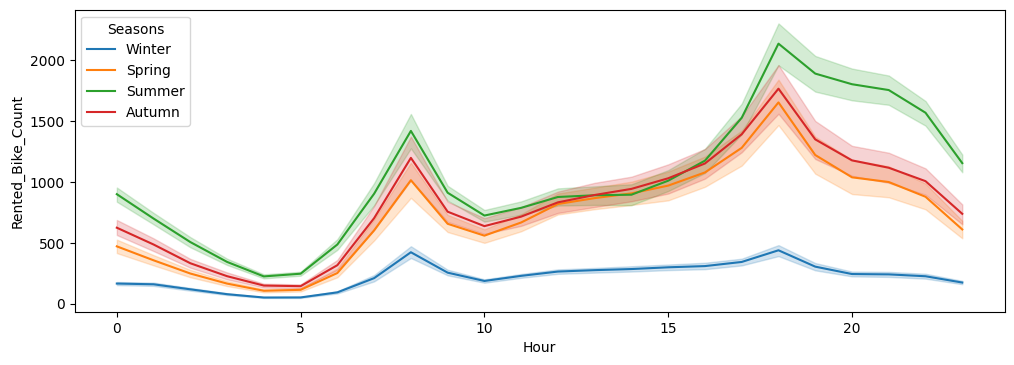

In [52]:
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=bike_data, x="Hour", y="Rented_Bike_Count", hue="Seasons")

**#Relational Analysis - Findind correlation betwwen different variables**

In [53]:
np.round(bike_data.corr()['Rented_Bike_Count'],3)

Rented_Bike_Count        1.000
Hour                     0.410
Temperature              0.539
Humidity                -0.200
Wind_speed               0.121
Visibility               0.199
Dew_point_temperature    0.380
Solar_Radiation          0.262
Rainfall                -0.123
Snowfall                -0.142
Year                     0.215
Day                      0.047
Month                    0.071
weekday                 -0.022
Name: Rented_Bike_Count, dtype: float64

let's drop some columns which are not important

In [54]:
bike_data.drop('Months_string',axis=1,inplace=True)
bike_data.drop('Date',axis=1,inplace=True)

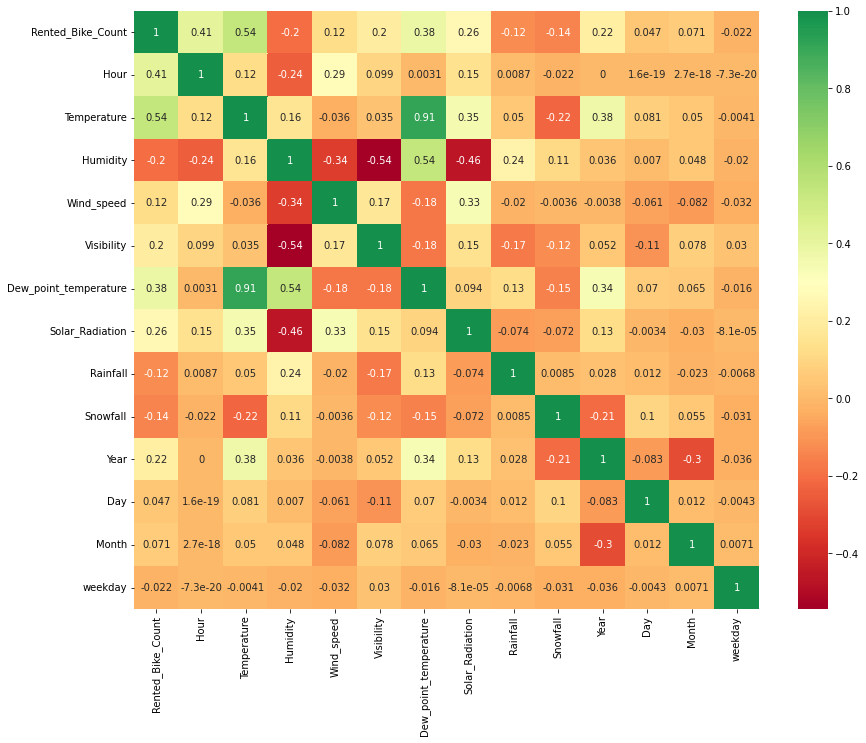

In [55]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = bike_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bike_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

* Temperature and Dew point temperature are highly correlated. We can add them to make one single column


In [56]:
bike_data['Temperature_and_DP_Temp'] = [bike_data['Temperature'][i]+bike_data['Dew_point_temperature'][i] for i in range(len(bike_data))]
bike_data.drop(['Temperature','Dew_point_temperature'],axis=1,inplace=True)


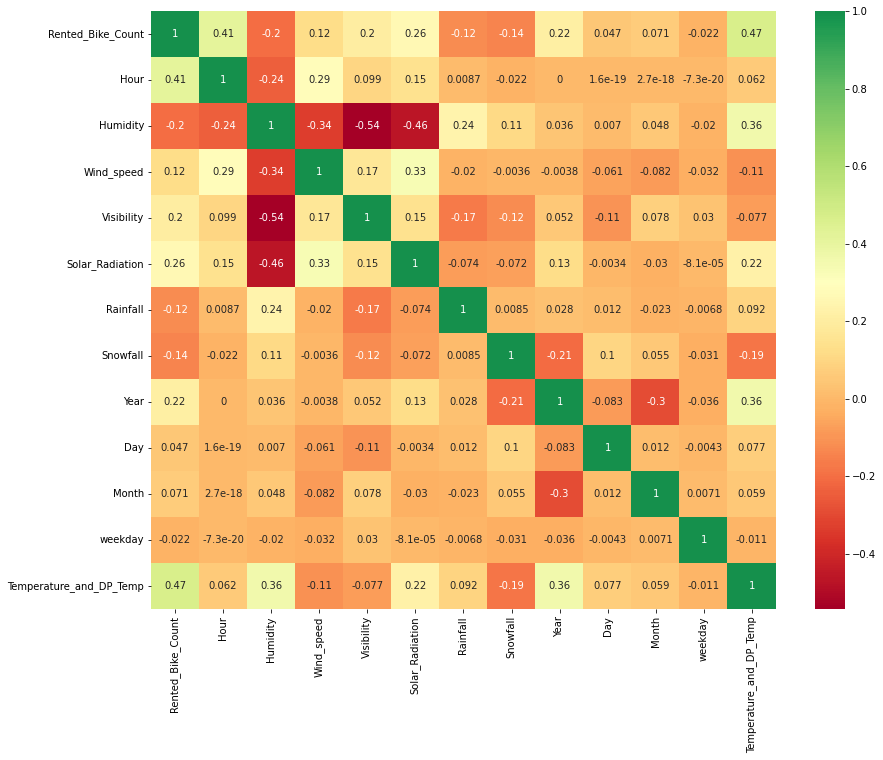

In [57]:
corrmat = bike_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bike_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

In [58]:
bike_data=pd.get_dummies(bike_data,drop_first=True)


In [59]:
bike_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,weekday,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,4,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,4,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,4,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,4,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,4,-24.6,0,0,1,1,1


In [60]:
# removing highly unimportant column
bike_data.drop('weekday',axis=1,inplace=True)

In [61]:
bike_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,-24.6,0,0,1,1,1


In [62]:
bike_data.shape

(8760, 17)

# **Model Building**

In [63]:
# Data for all the independent variables
X = bike_data.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable

y = np.sqrt(bike_data['Rented_Bike_Count'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [64]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [65]:
print(model.feature_importances_)


[0.2617848  0.12234078 0.01423669 0.02975398 0.0558843  0.03385664
 0.00264878 0.00132407 0.01792072 0.01646312 0.0698959  0.01668133
 0.00971949 0.18194059 0.00549067 0.16005816]


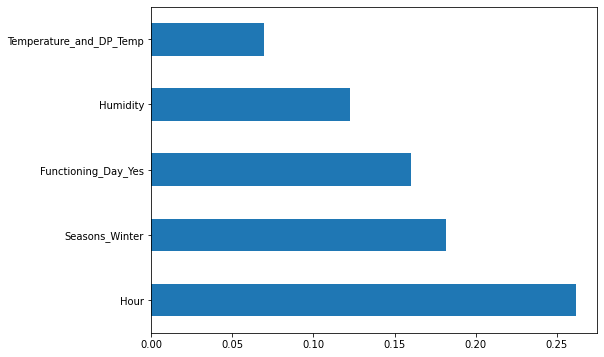

In [66]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#Train Test Split Model

In [67]:
#import train-test split
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [69]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 16) (7008,)
(1752, 16) (1752,)


## **In this project we are using four model on our data set for getting best performance:-**

LINEAR REGRESION 

DECISION TREE

RANDOM FORREST 

XGBOOST

#Linear Regression Model

For linear regression we have some assumptions, given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied:(rewrite)

* **Linear relationship**: Relationship between response and feature variables should be linear. The linearity assumption can be tested using scatter plots.
* **Little or no multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.
* **Little or no auto-correlation**: Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
* **Homoscedasticity**: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent

In [70]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [71]:
# all coeffient
reg.score(X_train, y_train)

0.6547192361864398

In [72]:
reg.coef_

array([ 4.87925477e-01, -2.29940503e-01,  1.89672962e-01, -1.56414191e-04,
       -8.02486527e-01, -1.39558289e+00,  1.86527269e-01, -2.64795650e+00,
       -1.86084876e-02, -2.30326900e-02,  2.47906155e-01, -2.89868003e+00,
       -2.84332142e+00, -9.04145095e+00,  2.85999149e+00,  2.84894893e+01])

In [73]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [74]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.95555328513579
RMSE : 7.277056636108846
R2 : 0.6547192361864398
Adjusted R2 : 0.6515350908140958


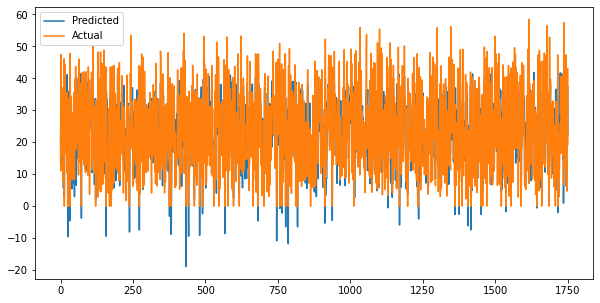

In [75]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

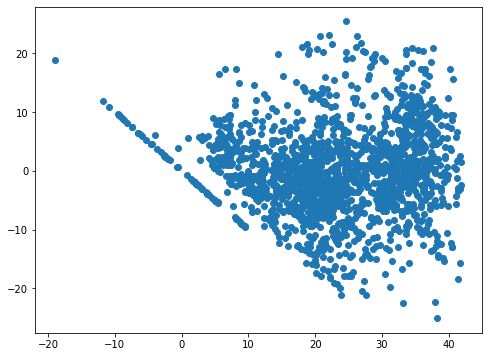

In [76]:
# Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

# Implementing lasso Regression

In [77]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
lasso.score(X_train, y_train)

0.6436819185266032

In [79]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [80]:
# mterics for lasso regressor
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.64834166119503
RMSE : 7.392451667829492
R2 : 0.6436819185266032
Adjusted R2 : 0.6403959880922664


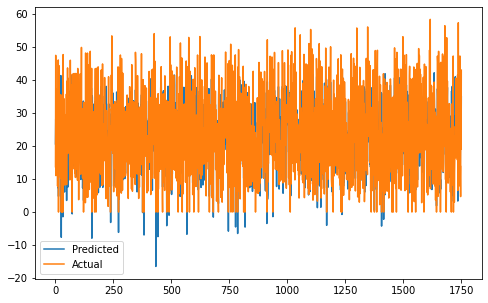

In [81]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

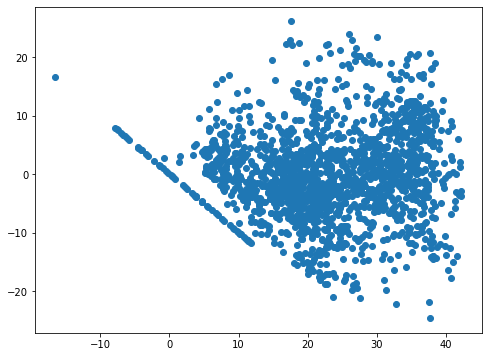

In [82]:
# Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# Implementing Ridge Regression

In [83]:
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [84]:
# ridge score
ridge.score(X_train, y_train)

0.6547191910419368

In [85]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [86]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.955560208927636
RMSE : 7.277057111836325
R2 : 0.6547191910419368
Adjusted R2 : 0.6515350452532745


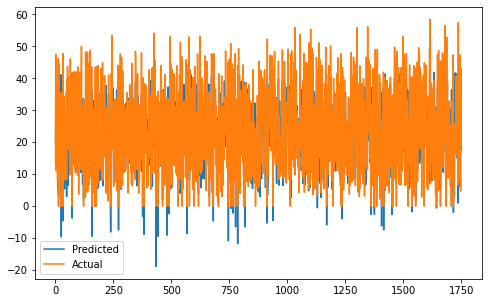

In [87]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

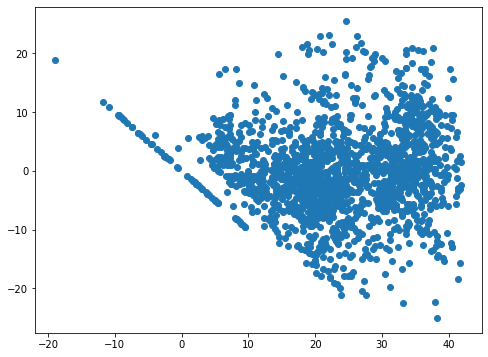

In [88]:
# Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# Implementing Elastic Net Regressor

In [89]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
#a*l1+b*l2
#alpha=a+b and l1 ratio=a/a+b
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
elasticnet.score(X_train, y_train)

0.5801724303474118

In [91]:
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [92]:
#metris for the elasticnet regression on train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 64.38876290053423
RMSE : 8.024260894346234
R2 : 0.5801724303474118
Adjusted R2 : 0.5763008216359182


In [93]:
#metris for the elasticnet regression on test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 67.17969621593292
RMSE : 8.196322115188796
R2 : 0.5839597419629589
Adjusted R2 : 0.5801230594680928


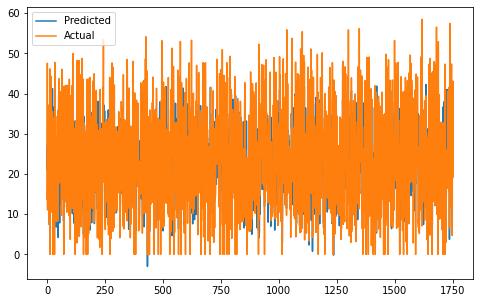

In [94]:
#plot for pred vs actual for test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

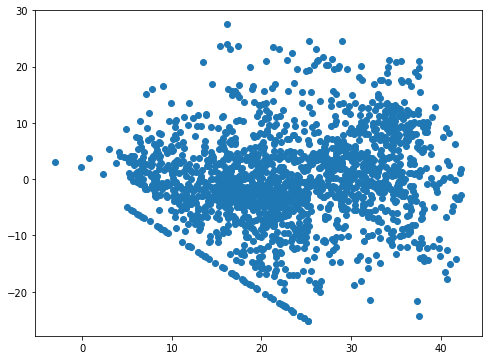

In [95]:
#Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# Implementing of decision tree by using decision tree regressor

In [96]:
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [97]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [98]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8348826273068872
MSE : 25.32397615024148
RMSE : 5.0322933291136245
R2 : 0.8348826273068872
Adjusted R2 : 0.8333599310745589


In [99]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 29.195835621971373
RMSE : 5.403317094338567
R2 : 0.8191917548014871
Adjusted R2 : 0.817524358880348


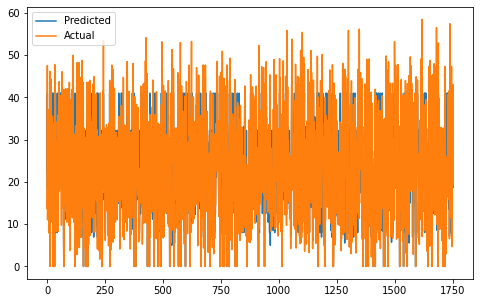

In [100]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

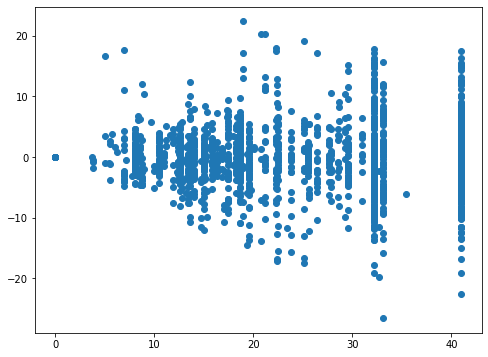

In [101]:
# Heteroscadacity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

# Visualization of decision tree

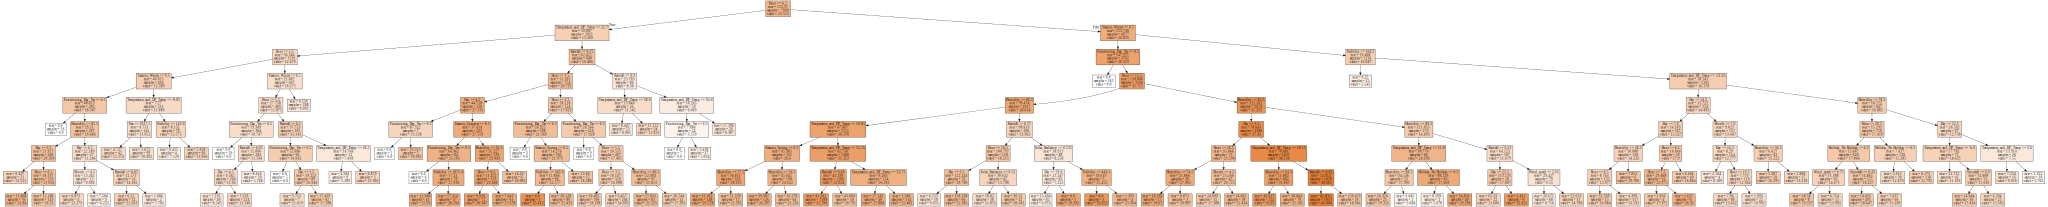

In [102]:
graph = Source(tree.export_graphviz(decision_regressor, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

# Implementing Random forrest classifier

In [103]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9869408928638893
MSE : 2.0028693060237015
RMSE : 1.4152276516602202
R2 : 0.9869408928638894
Adjusted R2 : 0.9868204630574469


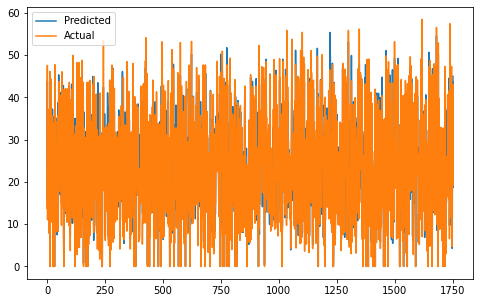

In [106]:
#pred vs actual for random forrest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

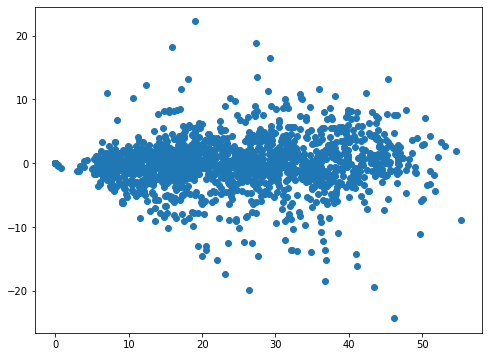

In [107]:
#Heteroscadacity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

In [108]:
rf_model.feature_importances_

array([0.28473367, 0.14125829, 0.01284049, 0.01502106, 0.02442534,
       0.03207463, 0.00155805, 0.00109609, 0.0180147 , 0.01131364,
       0.09896634, 0.00535605, 0.00471606, 0.18070179, 0.00247113,
       0.16545266])

In [109]:
importance_rf=rf_model.feature_importances_

In [110]:
imortance_rf_dict={"Feature":list(X_train.columns),"Feature importance":importance_rf}
imortance_rf_df=pd.DataFrame(imortance_rf_dict)

In [111]:
imortance_rf_df["Feature importance"]=round(imortance_rf_df["Feature importance"],2)

In [112]:
imortance_rf_df.sort_values(by=["Feature importance"],ascending=False)


,Feature,Feature importance
0,Hour,0.28
13,Seasons_Winter,0.18
15,Functioning_Day_Yes,0.17
1,Humidity,0.14
10,Temperature_and_DP_Temp,0.10
5,Rainfall,0.03
3,Visibility,0.02
4,Solar_Radiation,0.02
8,Day,0.02
2,Wind_speed,0.01


In [113]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [114]:
features=X_train.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

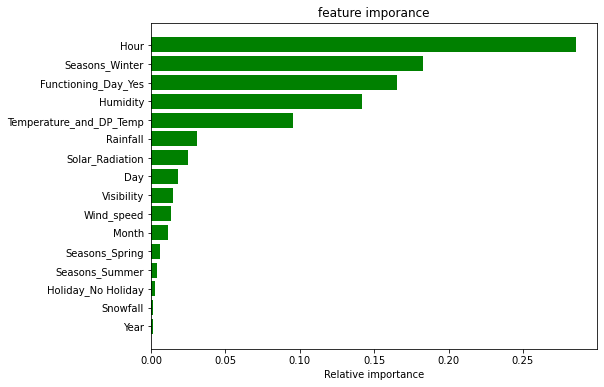

In [115]:
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()         

# Training Random forrest Regressor from GridesearchCV 

In [116]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,6,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [117]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

# Importing Random forrest classifier

In [118]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [119]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
rf_optimal_model = rf_grid.best_estimator_

In [121]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [122]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [123]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.845706893188289
MSE : 23.66386342828121
RMSE : 4.8645517191495875
R2 : 0.845706893188289
Adjusted R2 : 0.844284017275328


In [124]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.845706893188289
MSE : 26.73423436344361
RMSE : 5.170515870147157
R2 : 0.8344363194611782
Adjusted R2 : 0.8329095074216272


In [125]:
rf_optimal_model.feature_importances_

array([3.15654949e-01, 1.44739412e-01, 1.85032569e-04, 1.20804995e-03,
       6.51588971e-03, 2.31940582e-02, 2.64395106e-04, 9.35338519e-04,
       3.92489098e-03, 1.04153248e-03, 7.89719492e-02, 3.16464602e-03,
       4.31074478e-03, 2.22782100e-01, 3.90187760e-04, 1.92716823e-01])

In [126]:
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X_train.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)

In [127]:
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)

In [128]:
imortance_rf_gddf.head()

,Feature,Feature importance
0,Hour,0.32
1,Humidity,0.14
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.01


In [129]:
imortance_rf_gddf.sort_values(by=["Feature importance"],ascending=False)

,Feature,Feature importance
0,Hour,0.32
13,Seasons_Winter,0.22
15,Functioning_Day_Yes,0.19
1,Humidity,0.14
10,Temperature_and_DP_Temp,0.08
5,Rainfall,0.02
4,Solar_Radiation,0.01
2,Wind_speed,0.00
3,Visibility,0.00
6,Snowfall,0.00


In [130]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [131]:
features=X_train.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)

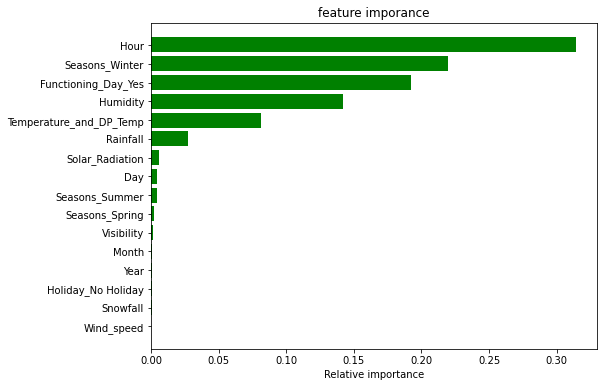

In [132]:
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rfgd[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()  

# Implementing Gradient Boosting Regression

In [134]:
gbd_model=GradientBoostingRegressor()
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [136]:
# Making predictions on train and test data

y_pred_train_gb = gbd_model.predict(X_train)
y_pred_test_gb = gbd_model.predict(X_test)

In [138]:
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.883539068956644
MSE : 17.86155988357657
RMSE : 4.226293870943734
R2 : 0.883539068956644
Adjusted R2 : 0.8824650776617197
